In [88]:
#run the following command in your shell
#conda install -c conda-forge cartopy
from pydataset import data
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.patches as mpatches
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
data()
df = data('HairEyeColor')
df.head()

,Hair,Eye,Sex,Freq
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11


In [47]:
x=df['Hair']
y=df['Freq']
z=df['Eye']
testa=np.linspace(0,4*np.pi,1000)
testb=np.sin(testa)
c=df['Sex']
colormap={'Male':'red','Female':'yellow'}

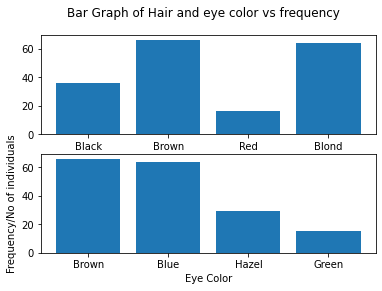

In [48]:
#fig= plt.scatter(x,y)
# plt.bar(x)
fig,ax=plt.subplots(2,1,num=1,sharey=True)
# ax.plot(testa,testb)
# plt.show()
ax[0].bar(x,y)
# ax[0].set_ylabel('Frequency/No of individuals')
ax[0].set_xlabel('Hair Color')
ax[1].bar(z,y)
ax[1].set_ylabel('Frequency/No of individuals')
ax[1].set_xlabel('Eye Color')
fig.suptitle('Bar Graph of Hair and eye color vs frequency')
plt.show()

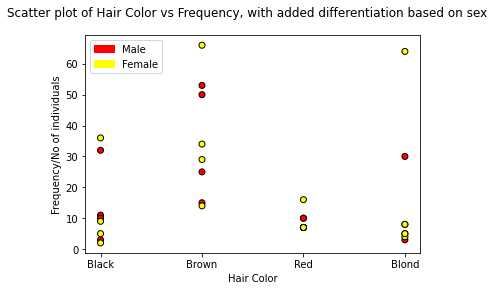

<Figure size 1872x2160 with 0 Axes>

In [105]:
fig1,ax1=plt.subplots(1,1,num=2)
ax1.scatter(x,y,c=[colormap[ci] for ci in c ],edgecolor='black')
ax1.set_ylabel('Frequency/No of individuals')
ax1.set_xlabel('Hair Color')
fig1.suptitle('Scatter plot of Hair Color vs Frequency, with added differentiation based on sex')
ax1.legend(colormap)
red_patch = mpatches.Patch(color='red', label='Male')
yellow_patch = mpatches.Patch(color='yellow', label='Female')
ax1.legend(handles=[red_patch,yellow_patch])

In [118]:
dir=os.getcwd()
path=dir+"\gasindex\Gasoline Index in Europe 2022.xlsx"
print(path)
gasindex=pd.read_excel(path)
gasindex.head(50)
# fig2,ax2=plt.subplots(1,1,num=3)
price=gasindex['Average price in june 2022, euro/liter']
country=gasindex['Country']
# ax2.stem(country,price)
# fig2.suptitle('gas price of country')


C:\Users\davis\Documents\BSE\Brushup\pset5\gasindex\Gasoline Index in Europe 2022.xlsx


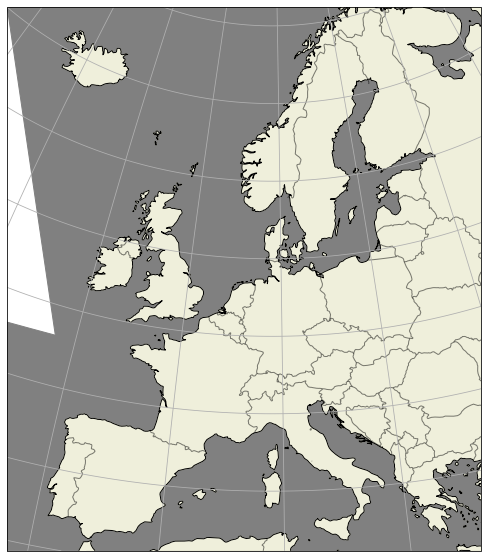

In [114]:
#run the following command in your shell
#conda install -c conda-forge cartopy
plt.figure(figsize=(10,10))
axmap = plt.axes(projection=ccrs.EuroPP())
axmap.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)
axmap.coastlines(resolution='50m')
axmap.add_feature(cartopy.feature.OCEAN,facecolor=(0.5,0.5,0.5))
axmap.add_feature(cartopy.feature.LAND)
axmap.gridlines()

cmap = matplotlib.cm.get_cmap('viridis')

for country, lag_norm in zip(countries, price):
    # read the borders of the country in this loop
    poly = df.loc[df['ADMIN'] == country]['geometry'].values[0]
    # get the color for this country
    rgba = cmap(lag_norm)
    # plot the country on a map
    ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=rgba, edgecolor='none', zorder=1)

# Add a scatter plot of the original data so the colorbar has the correct numbers. Hacky but it works
dummy_scat = ax.scatter(lags, lags, c=lags, cmap=cmap, zorder=0)
fig.colorbar(mappable=dummy_scat, label='Time lag of phenomenon', orientation='horizontal', shrink=0.8)
plt.show()